<a href="https://colab.research.google.com/github/young-un11/Matplotlib-/blob/main/0704_%EA%B8%B0%EB%B3%B8%ED%94%8C%EB%A1%AF_%EB%A7%8C%EB%93%A4%EA%B8%B0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

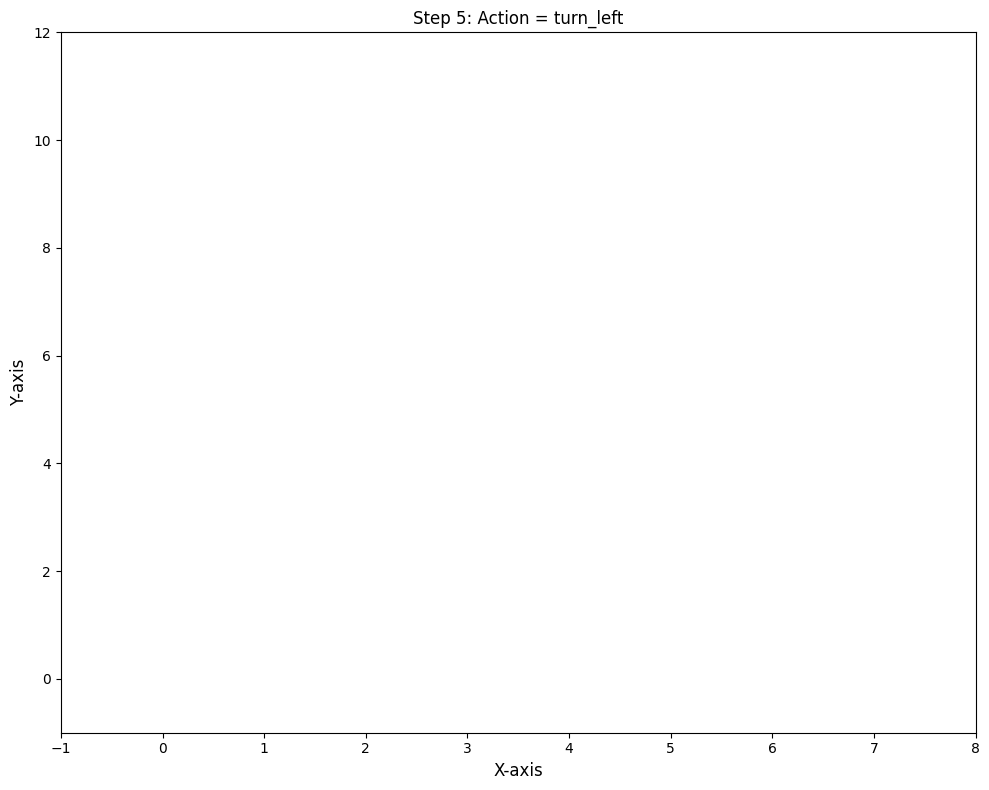

In [10]:
import matplotlib.pyplot as plt

def setup_basic_plot(step_num=1, action="forward"):
    fig, ax = plt.subplots(figsize=(10, 8))

    # 축 범위 설정
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)

    # 제목과 라벨 설정 (글자 크기 12)
    ax.set_title(f"Step {step_num}: Action = {action}", fontsize=12)
    ax.set_xlabel("X-axis", fontsize=12)
    ax.set_ylabel("Y-axis", fontsize=12)

    plt.tight_layout()
    plt.show()

    return ax

if __name__ == "__main__":
    setup_basic_plot(5, "turn_left")


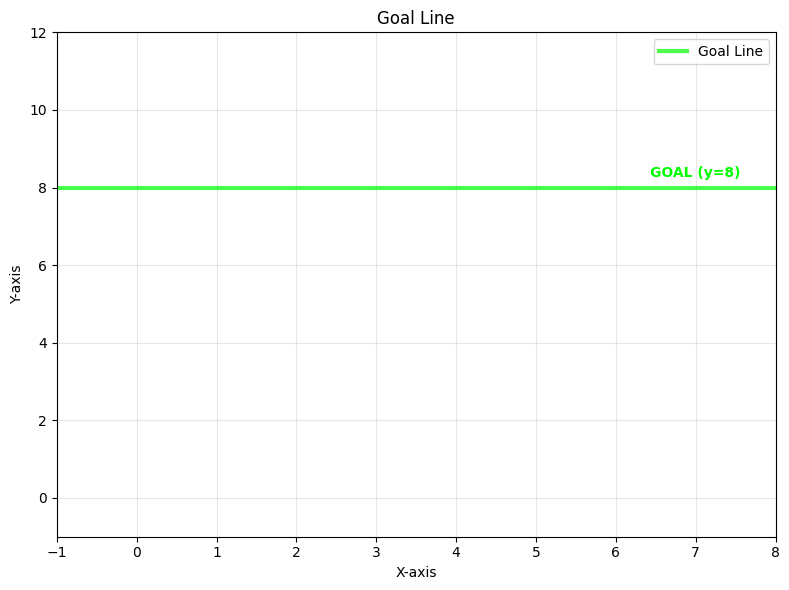

Returned goal_y: 8


In [11]:
import matplotlib.pyplot as plt

def draw_goal_line(obstacles):
    # 타입 확인 및 list 변환
    if isinstance(obstacles, set):
        obstacles = list(obstacles)

    # 목표선 Y 좌표 계산
    if obstacles:
        max_y = max(y for x, y in obstacles)
        goal_y = max_y + 3
    else:
        goal_y = 0

    # 캔버스 설정
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_title("Goal Line")

    # 목표선 그리기
    ax.axhline(y=goal_y, color='lime', linewidth=3, alpha=0.7, label='Goal Line')

    # 텍스트 표시
    ax.text(7, goal_y + 0.2, f"GOAL (y={goal_y})", color='lime', ha='center', va='bottom', fontsize=10, weight='bold')

    # 범례 및 레이아웃
    ax.legend()
    plt.tight_layout()
    plt.show()

    return goal_y

if __name__ == "__main__":
    obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}
    result = draw_goal_line(obstacles)
    print(f"Returned goal_y: {result}")


Obstacle 1: 위치=(4, 5)
Obstacle 2: 위치=(3, 3)
Obstacle 3: 위치=(3, 2)
Obstacle 4: 위치=(2, 4)


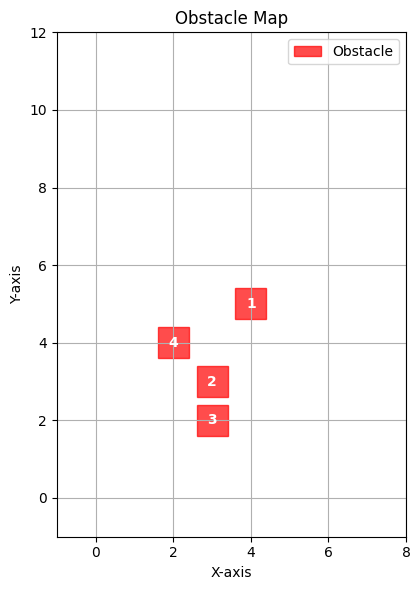

In [12]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def draw_obstacles(obstacles):
    # set이면 list로 변환 (순서 보장)
    if isinstance(obstacles, set):
        obstacles = list(obstacles)

    # 캔버스 설정
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_title("Obstacle Map")

    # 장애물 그리기
    for idx, (x, y) in enumerate(obstacles):
        rect = Rectangle((x - 0.4, y - 0.4), 0.8, 0.8,
                         color='red', alpha=0.7,
                         label='Obstacle' if idx == 0 else "")
        ax.add_patch(rect)
        ax.text(x, y, str(idx + 1), color='white',
                ha='center', va='center', fontsize=10, weight='bold')
        print(f"Obstacle {idx + 1}: 위치=({x}, {y})")

    # 범례 표시
    ax.legend()

    # 레이아웃 최적화
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}
    draw_obstacles(obstacles)


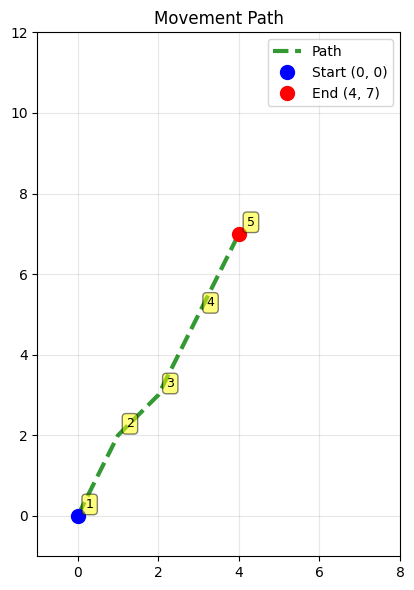

In [13]:
import matplotlib.pyplot as plt

def draw_path(path):
    # 캔버스 설정
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title("Movement Path")

    # x, y 분리
    path_x = [x for x, y in path]
    path_y = [y for x, y in path]

    # 경로 그리기 (2개 이상 점이 있을 때)
    if len(path) >= 2:
        ax.plot(path_x, path_y, 'g--', linewidth=3, alpha=0.8, label='Path')

    # 시작점 표시
    if path:
        start_x, start_y = path[0]
        ax.plot(start_x, start_y, 'bo', markersize=10, label=f"Start ({start_x}, {start_y})")

    # 끝점 표시
    if len(path) >= 2:
        end_x, end_y = path[-1]
        ax.plot(end_x, end_y, 'ro', markersize=10, label=f"End ({end_x}, {end_y})")

    # 각 점 번호 표시
    for idx, (x, y) in enumerate(path):
        ax.text(x + 0.2, y + 0.2, str(idx + 1),
                fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))

    ax.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    sample_path = [(0, 0), (1, 2), (2, 3), (3, 5), (4, 7)]
    draw_path(sample_path)


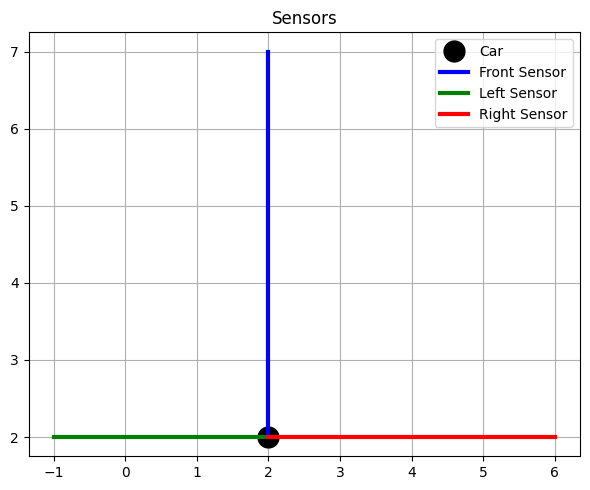

In [14]:
import matplotlib.pyplot as plt

def draw_sensors(x, y, sensors):
    # 캔버스 설정
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.grid(True)
    ax.set_title("Sensors")

    # 차량 위치 표시
    ax.plot(x, y, 'ko', markersize=15, label='Car')

    # 전방 센서
    ax.plot([x, x], [y, y + sensors['front']], 'b-', linewidth=3, label='Front Sensor')
    # 좌측 센서
    ax.plot([x, x - sensors['left']], [y, y], 'g-', linewidth=3, label='Left Sensor')
    # 우측 센서
    ax.plot([x, x + sensors['right']], [y, y], 'r-', linewidth=3, label='Right Sensor')

    ax.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    sensors = {'front': 5, 'left': 3, 'right': 4}
    draw_sensors(2, 2, sensors)
